# Data exploration and analysis of YouTube trending video statistics


## Introduction
YouTube is the most popular and most used video platfrom in the world today. YouTube has [a list of **trending videos**](https://www.youtube.com/feed/trending) that is updated constantly. Here we will use **Python** with some packages like **Pandas** and **Matplotlib** to analyze a dataset that was collected over 205 days. For each of those days, the dataset contains data about the trending videos of that day. It contains data about **more than `40,000` trending videos**. We will analyze this data to get insights into YouTube trending videos, to see what is common between these videos. Those insights might also be used by people who want to increase popularity of their videos on YouTube.

The dataset that we will use is obtained from Youtube API. It contains data about trending videos for many countries. Here we will analyze USA trending videos. 

## Goals of the project
We want to answer questions like:
* What makes a youtube video go trending?
* Which YouTube channels have the largest number of trending videos? Is there any correlation between video upload frequency and channel subscribers?
* What is the gross viewer feedback running Sentiment Analysis on comments left by viewers.

Let's get started.

## <a name="import"></a>Importing some packages
First, we import some Python packages that will help us analyzing the data, especially `pandas` for data analysis and `matplotlib` for visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import json

In [4]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

## <a name="read"></a>Reading the dataset
Then we read the dataset file which is in csv format

In [5]:
df = pd.read_csv('USvideos.csv')

We set some configuration options just for improving visualization graphs; nothing crucial

In [6]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## <a name="feel"></a>Getting a feel of the dataset
Let's get a feel of our dataset by displaying its first few rows

In [7]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Now, let's see some information about our dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


We can see that there are `40,949` entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have `40,949` non-null entries) except `description` column which has some `null` values; it only has `40,379` non-null values.

## <a name="clean"></a>Data cleaning
The `description` column has some null values. These are some of the rows whose description values are null. We can see that null values are denoted by `NaN`

In [9]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the `description` column

In [10]:
df["description"] = df["description"].fillna(value="")

## <a name="descn"></a>Describtion of numerical columns
Now, let's see some statistical information about the numerical columns of our dataset

In [13]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


We note from the table above that 
- The average number of views of a trending video is `2,360,784`. The median value for the number of views is `681,861`, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number
- The average number of likes of a trending video is `74,266`, while the average number of dislikes is `3,711`. The 
- Average comment count is `8,446` while the median is `1,856`

How useful are the observations above? Do they really represent the data? Let's examine more. 

### <a name="vh"></a>Views histogram
let's plot a [histogram](https://www.mathsisfun.com/data/histograms.html) for the `views` column to take a look at its distribution: to see how many videos have between `10` million and `20` million views, how many videos have between `20` million and `30` million views, and so on.

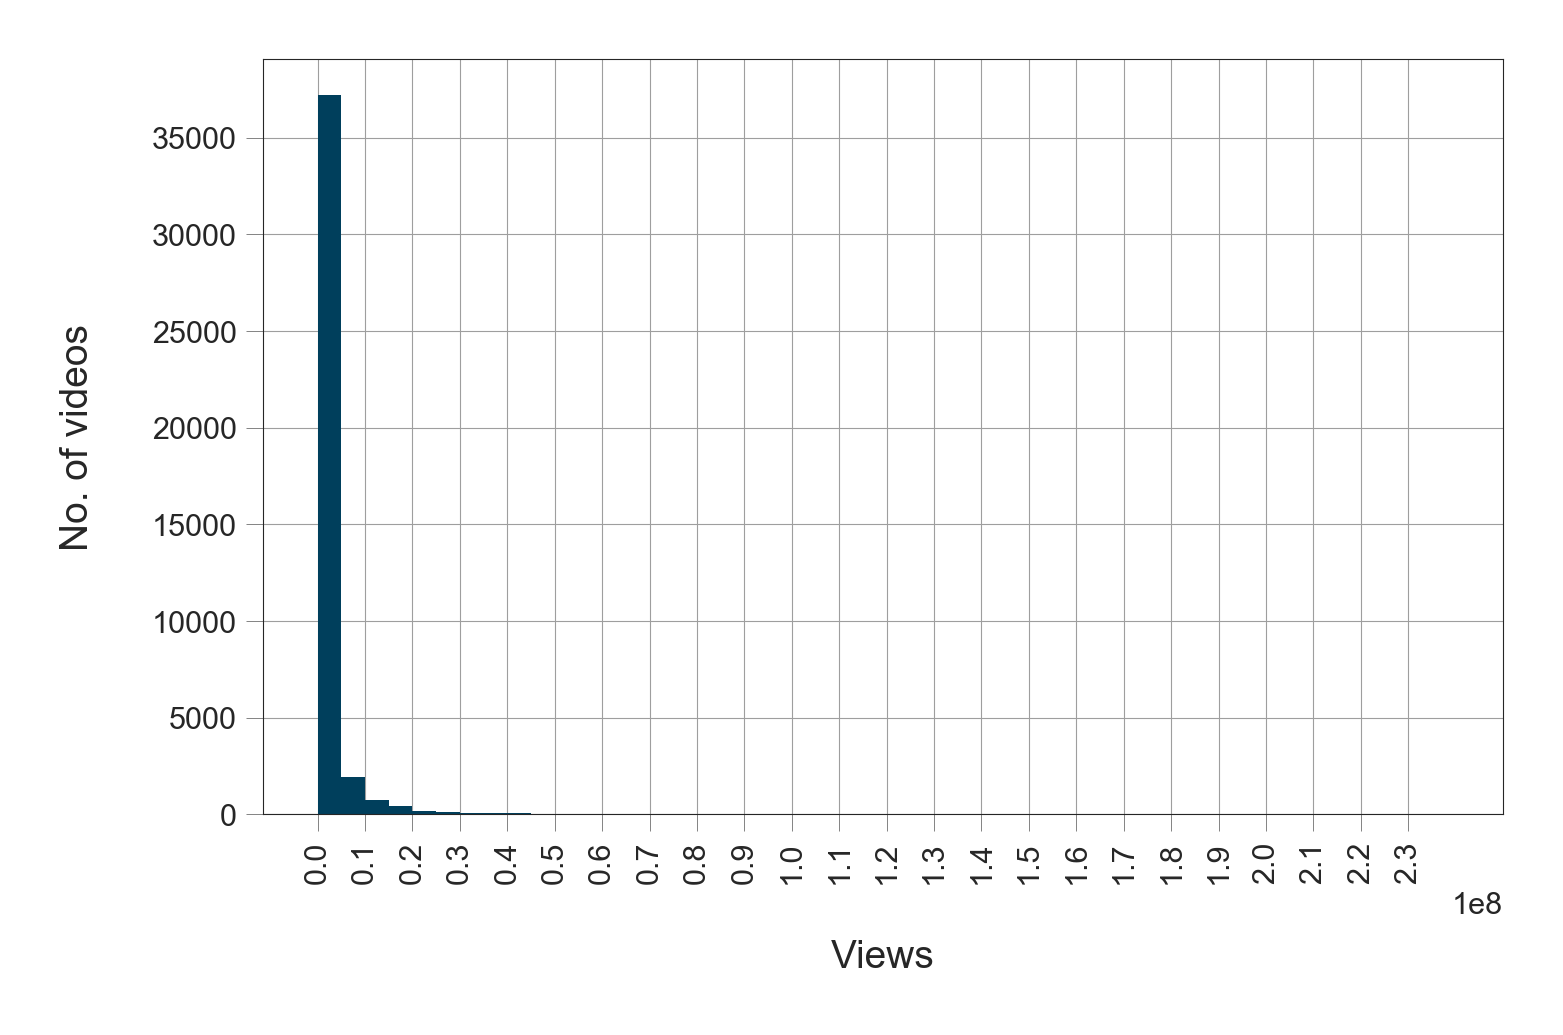

In [14]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have `5` million views or less. We get the `5` million number by calculating

\begin{align}
\frac{0.1 \times 10^8}{2} = 5 \times 10^6
\end{align}

Now let us plot the histogram just for videos with `25` million views or less to get a closer look at the distribution of the data

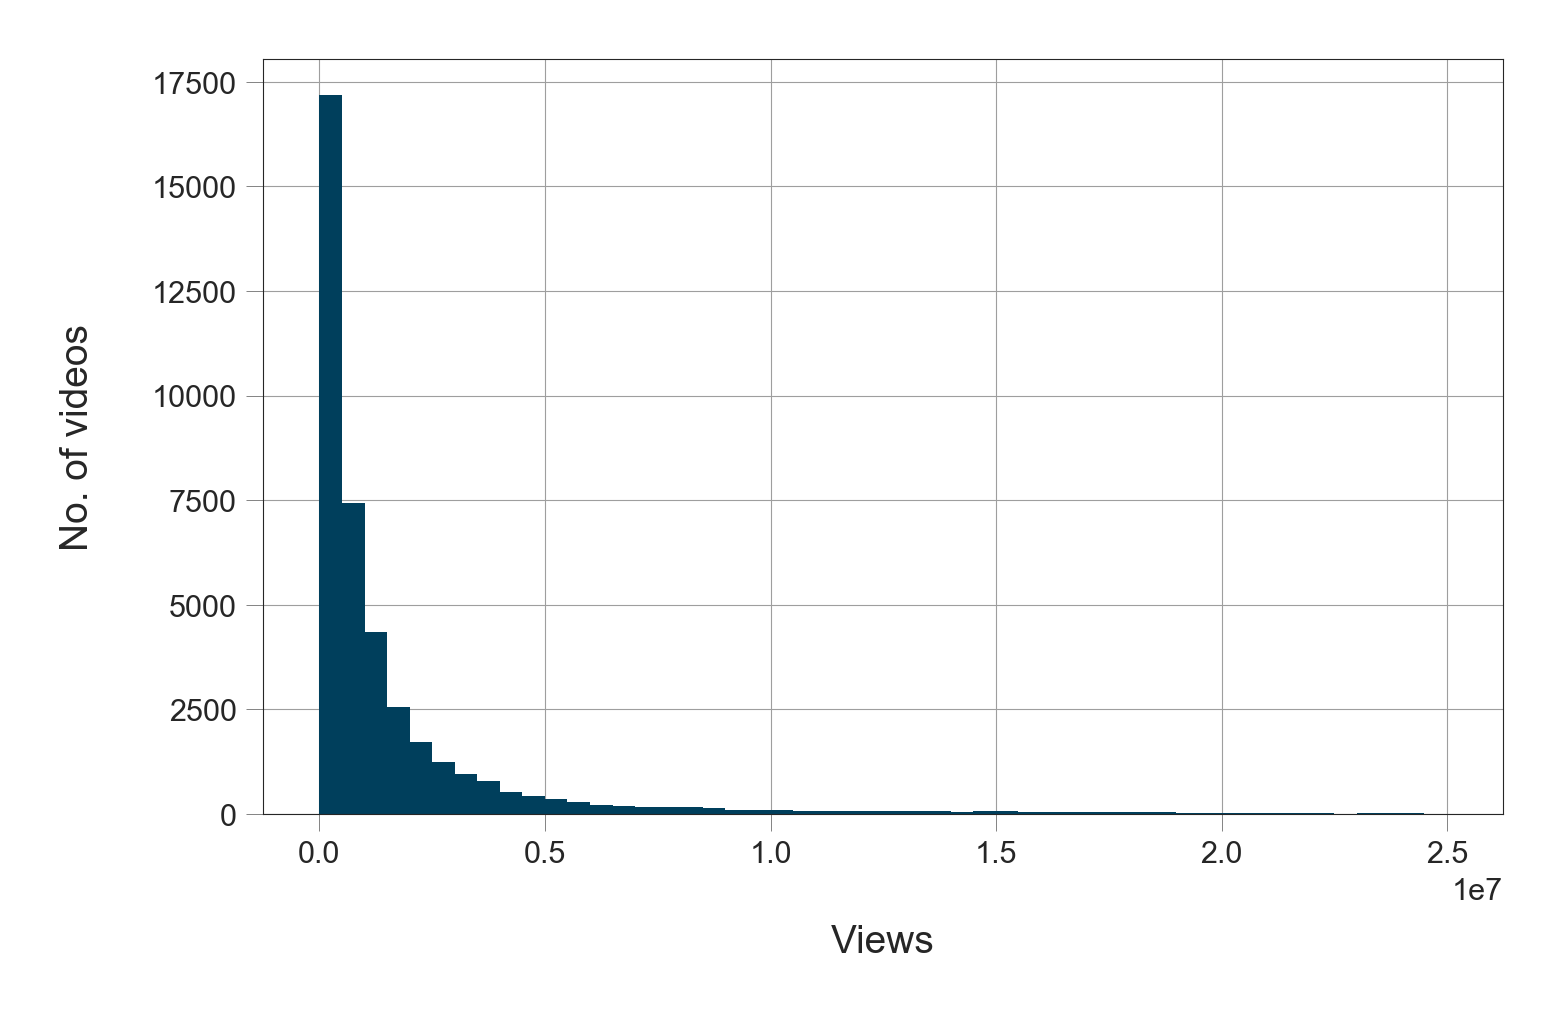

In [15]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

Now we see that the majority of trending videos have `1` million views or less. Let's see the exact percentage of videos less than `1` million views

In [16]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

60.09426359618062

So, it is around `60%`. Similarly, we can see that the percentage of videos with less than `1.5` million views is around `71%`, and that the percentage of videos with less than `5` million views is around `91%`.

### <a name="lh"></a>Likes histogram

After `views`, we plot the histogram for `likes` column

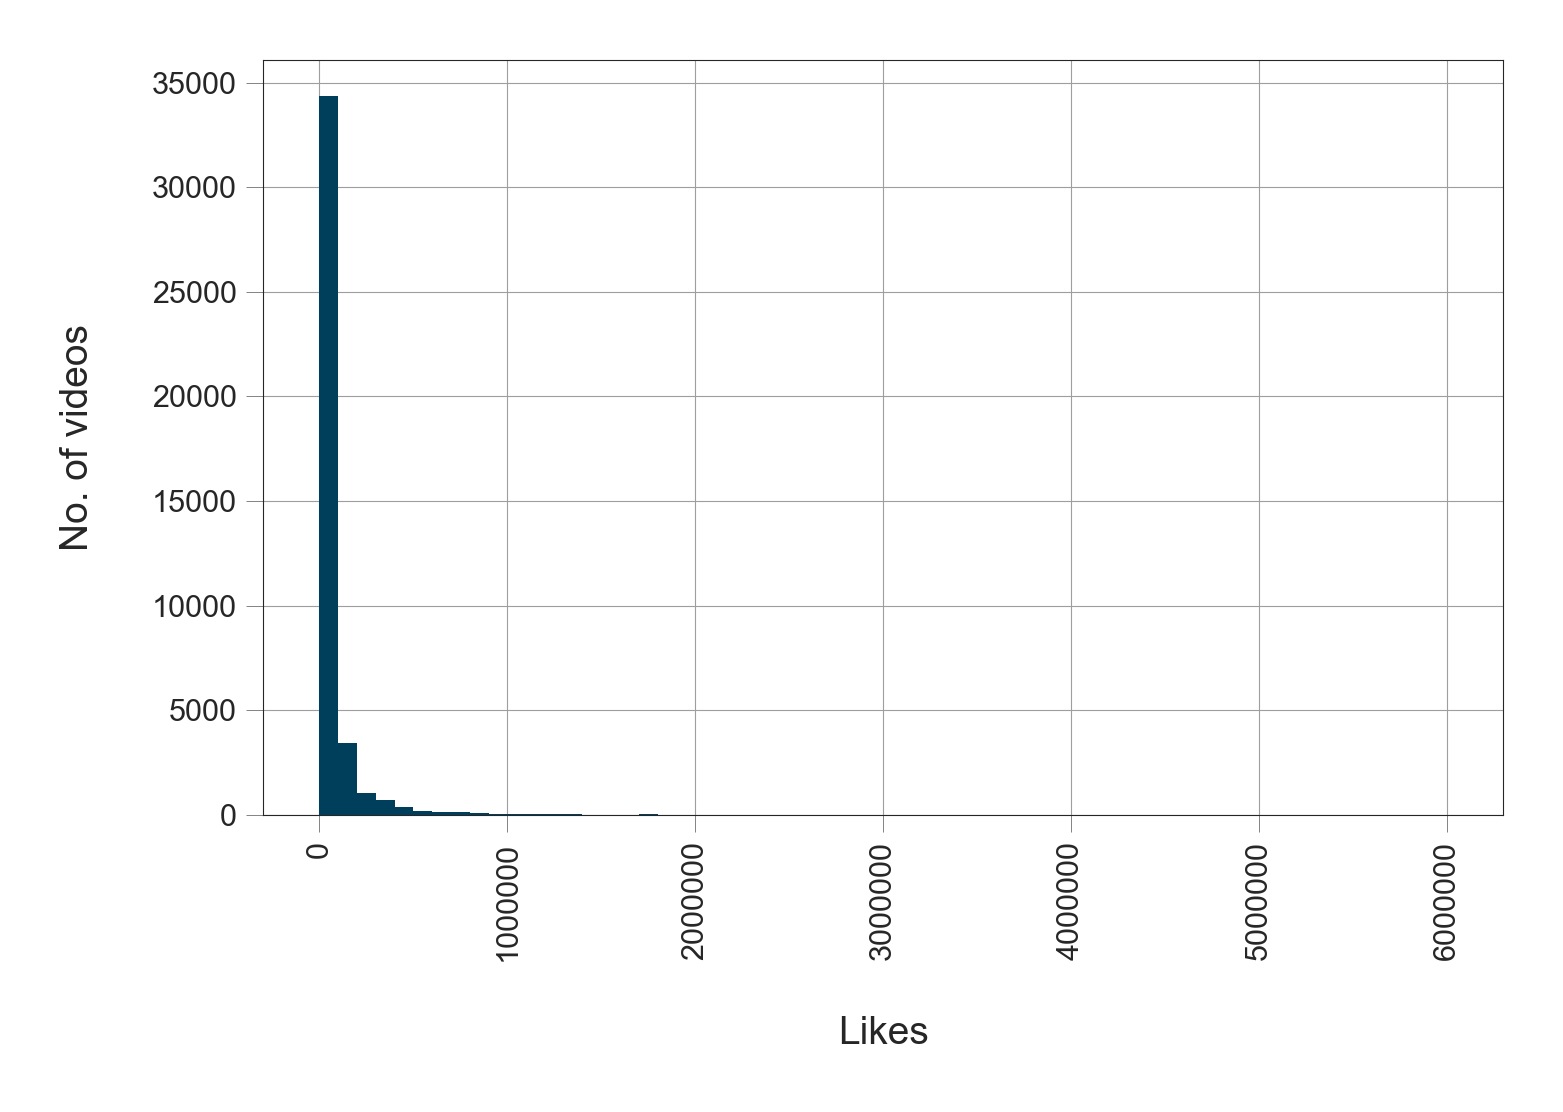

In [17]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have between `0` and `100,000` likes. Let us plot the histogram just for videos with `1000,000` likes or less to get a closer look at the distribution of the data

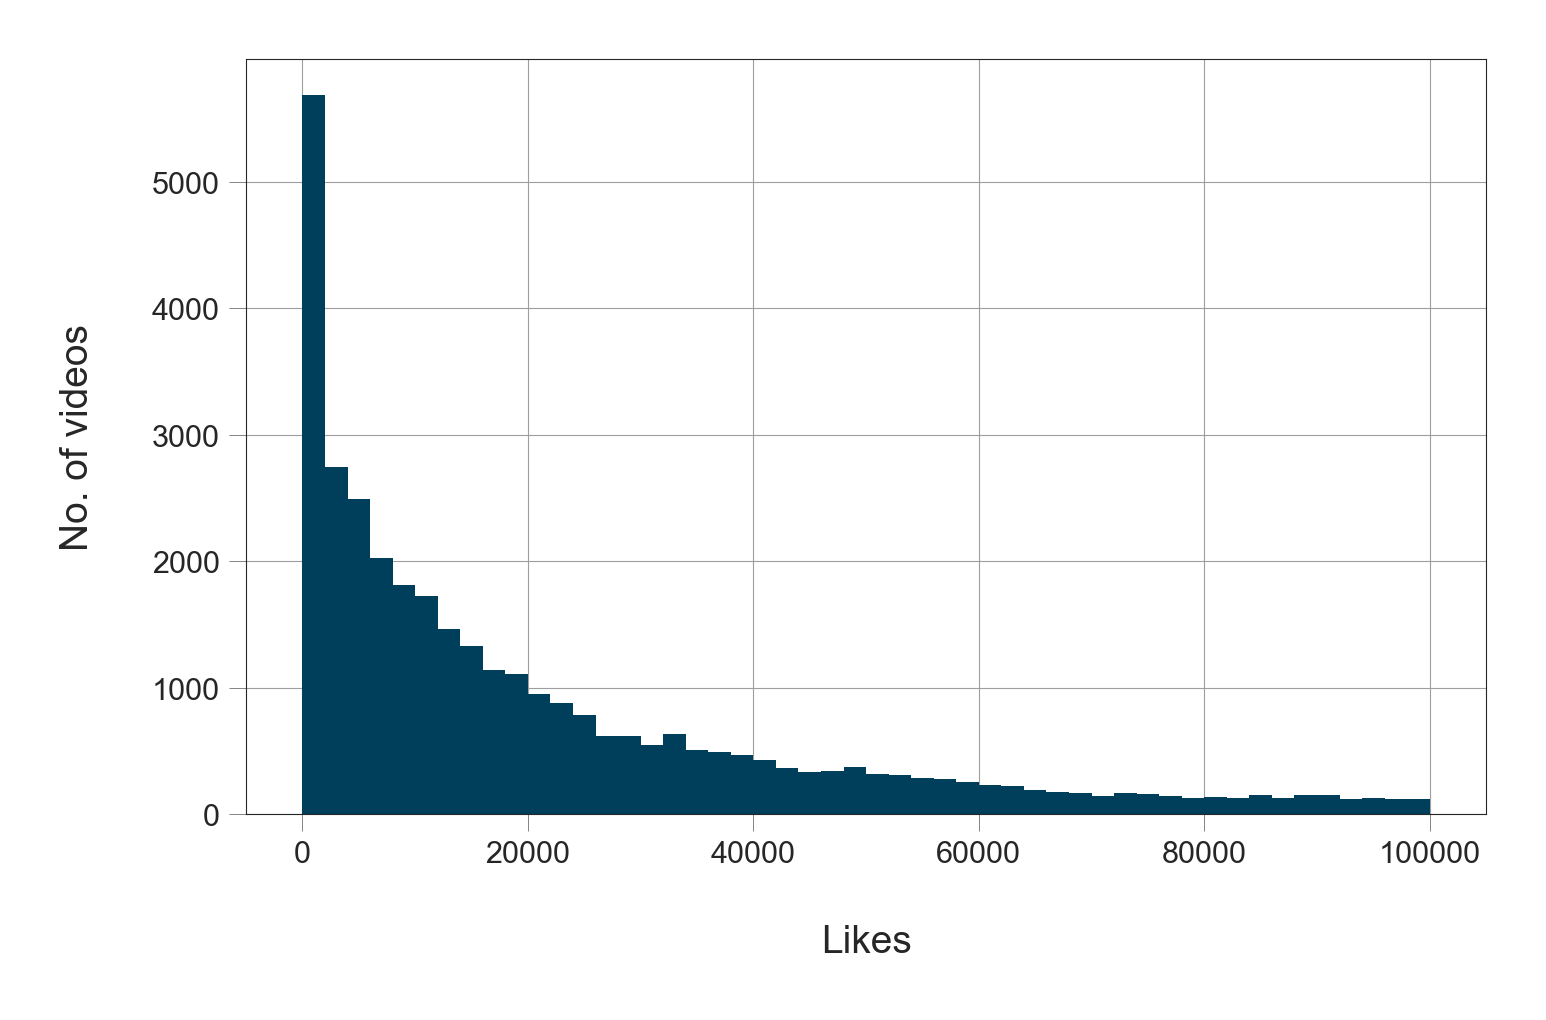

In [18]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Now we can see that the majority of trending videos have `40000` likes or less with a peak for videos with `2000` likes or less. 

Let's see the exact percentage of videos with less than `40000` likes 

In [ ]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

Similarly, we can see that the percentage of videos with less than `100,000` likes is around `84%`

### <a name="ch"></a>Comment count histogram

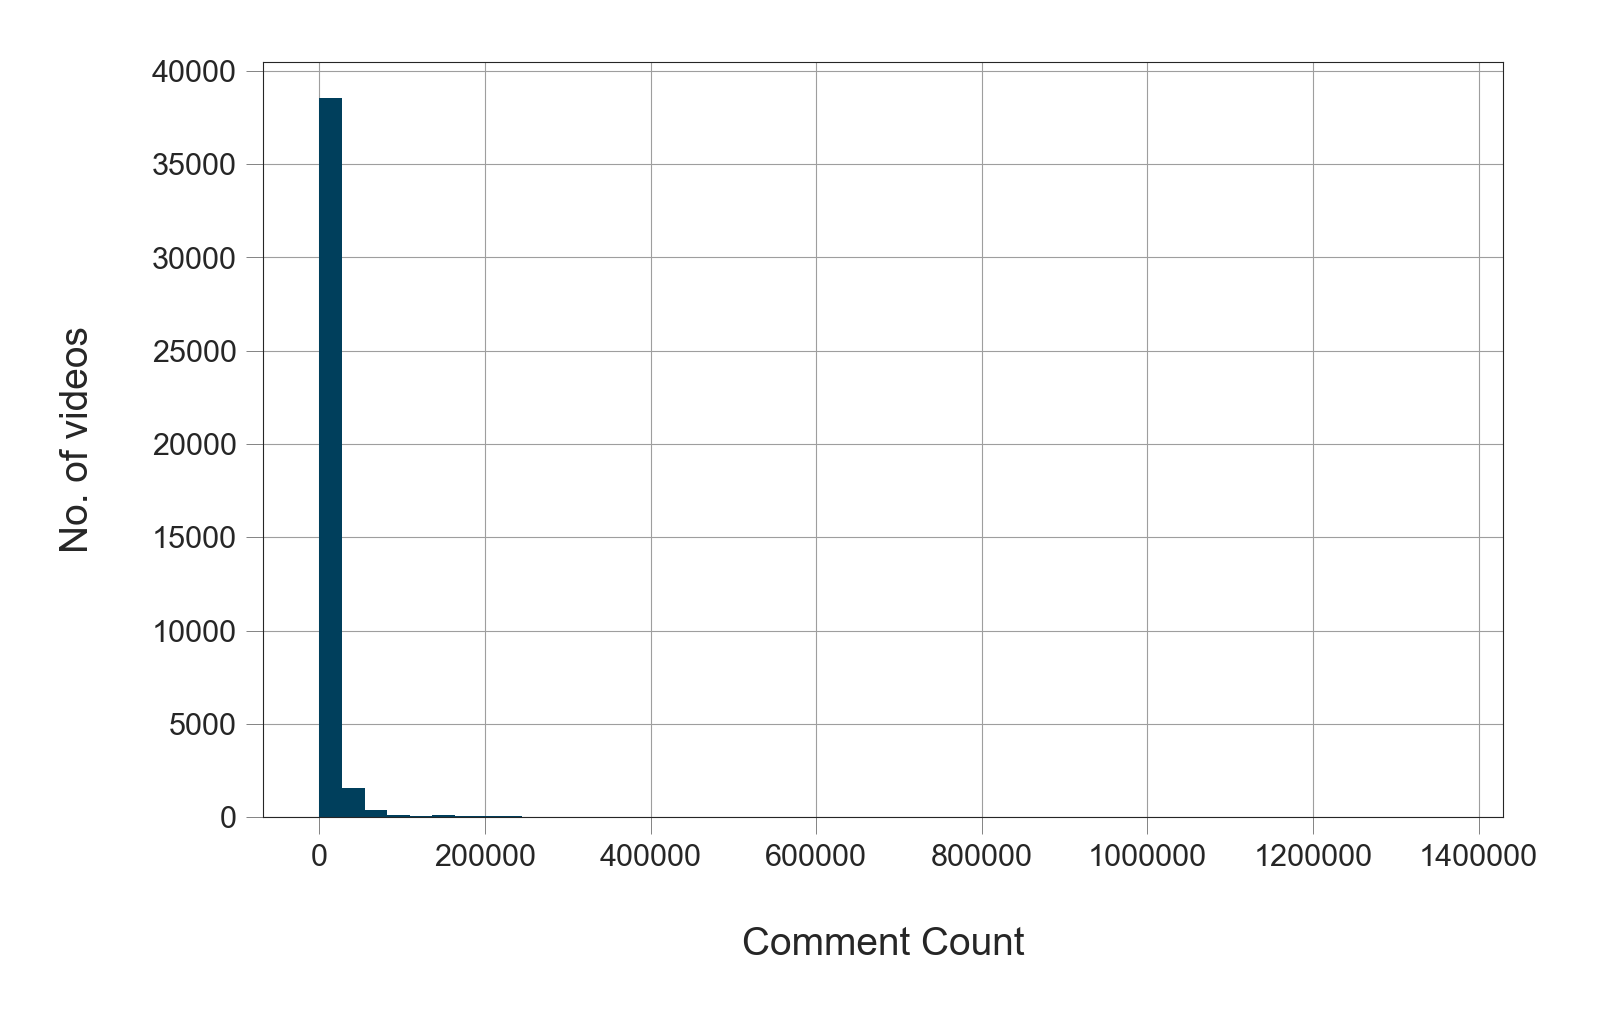

In [19]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

Let's get a closer look by eliminating entries with comment count larger than `200000` comment

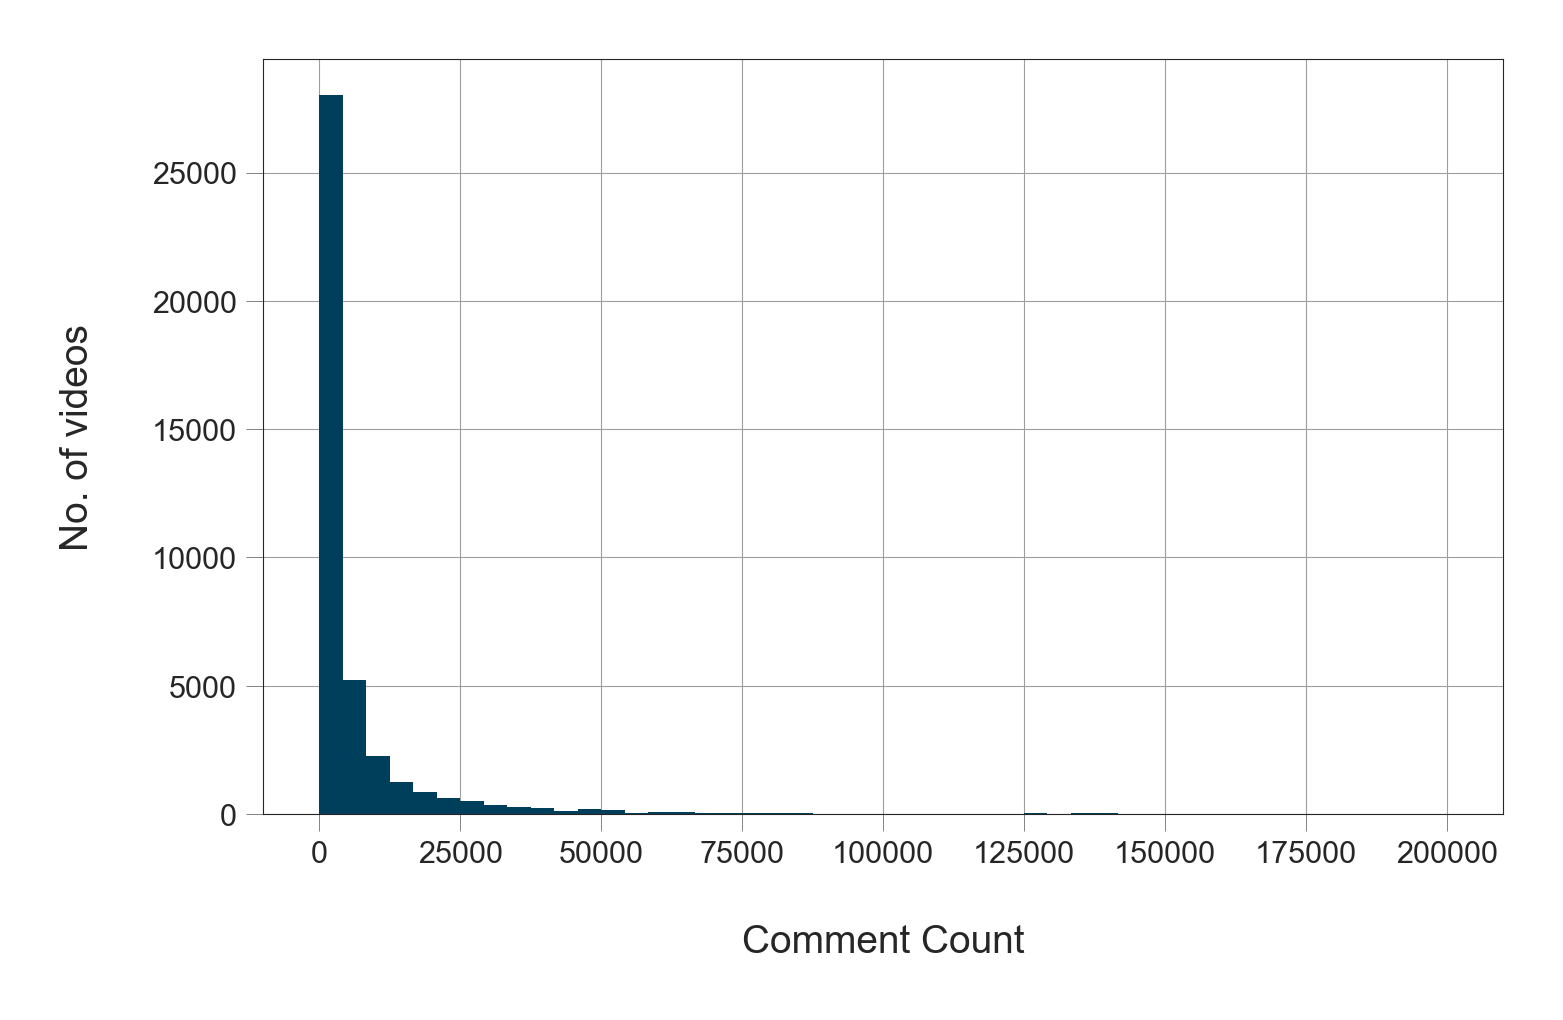

In [20]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

We see that most trending videos have around

\begin{align}
\frac{25000}{6} \approx 4166 \text{ comments}
\end{align}

since each division in the graph has six histogram bins. 

As with views and likes, let's see the exact percentage of videos with less than `4000` comments

In [21]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

67.48882756599673

In a similar way, we can see that the percentage of videos with less than `25,000` comments  is around `93%`.

## <a name="chan"></a>Which channels have the largest number of trending videos?

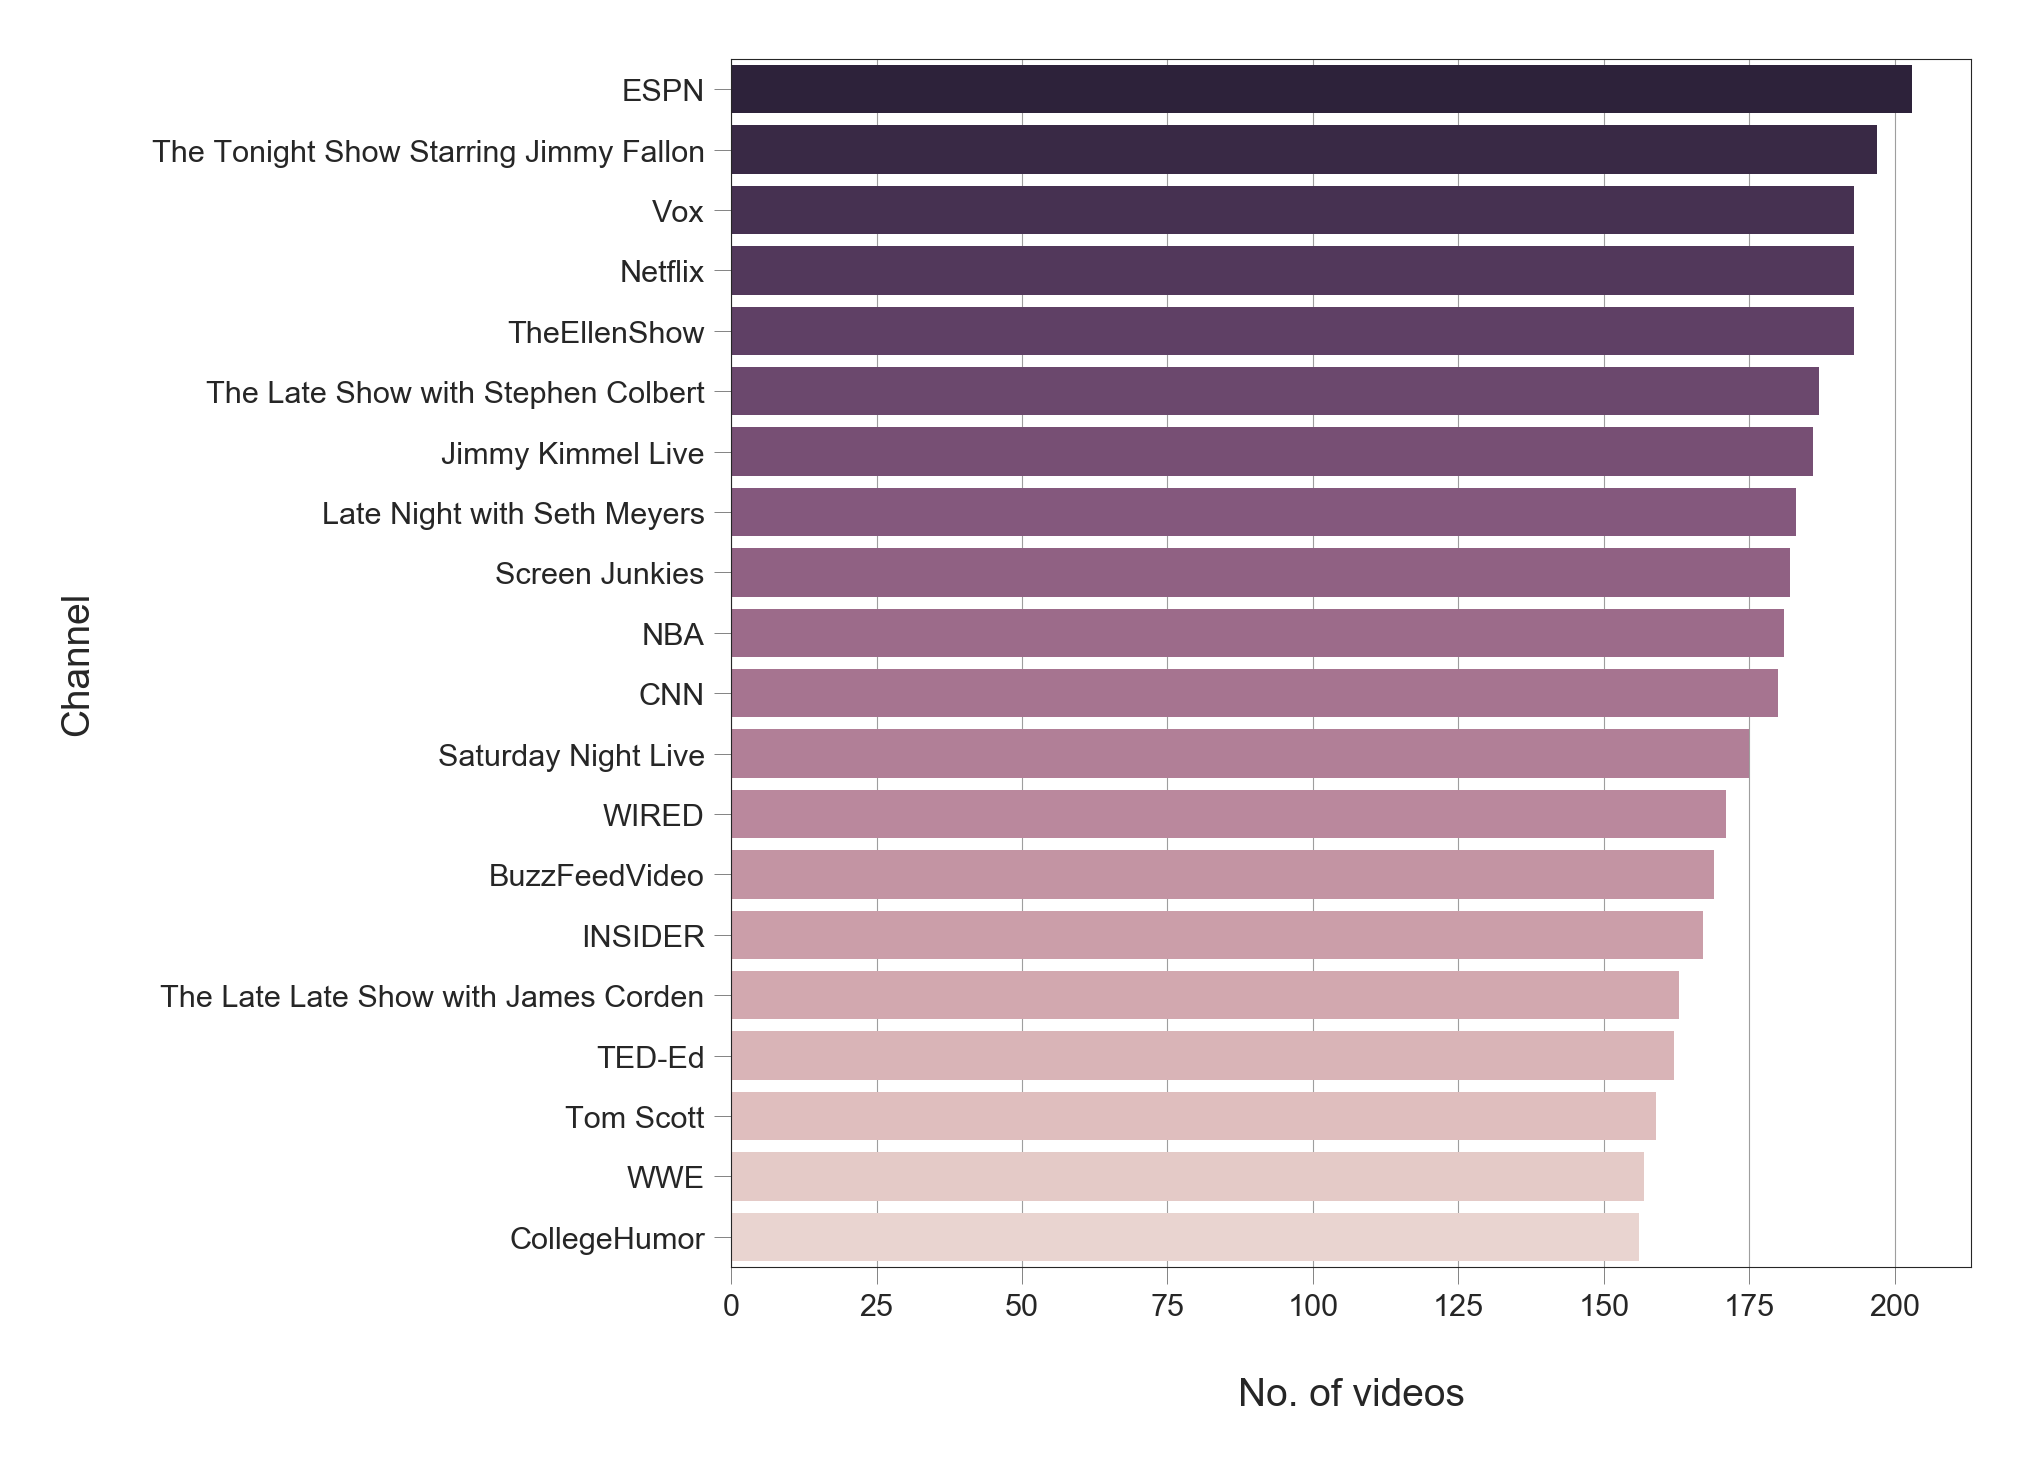

In [33]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

## <a name="cat"></a>Which video category has the largest number of trending videos?
First, we will add a column that contains category names based on the values in `category_id` column. We will use a category JSON file provided with the dataset which contains information about each category.

In [36]:
with open('US_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

Now we can see which category had the largest number of trending videos

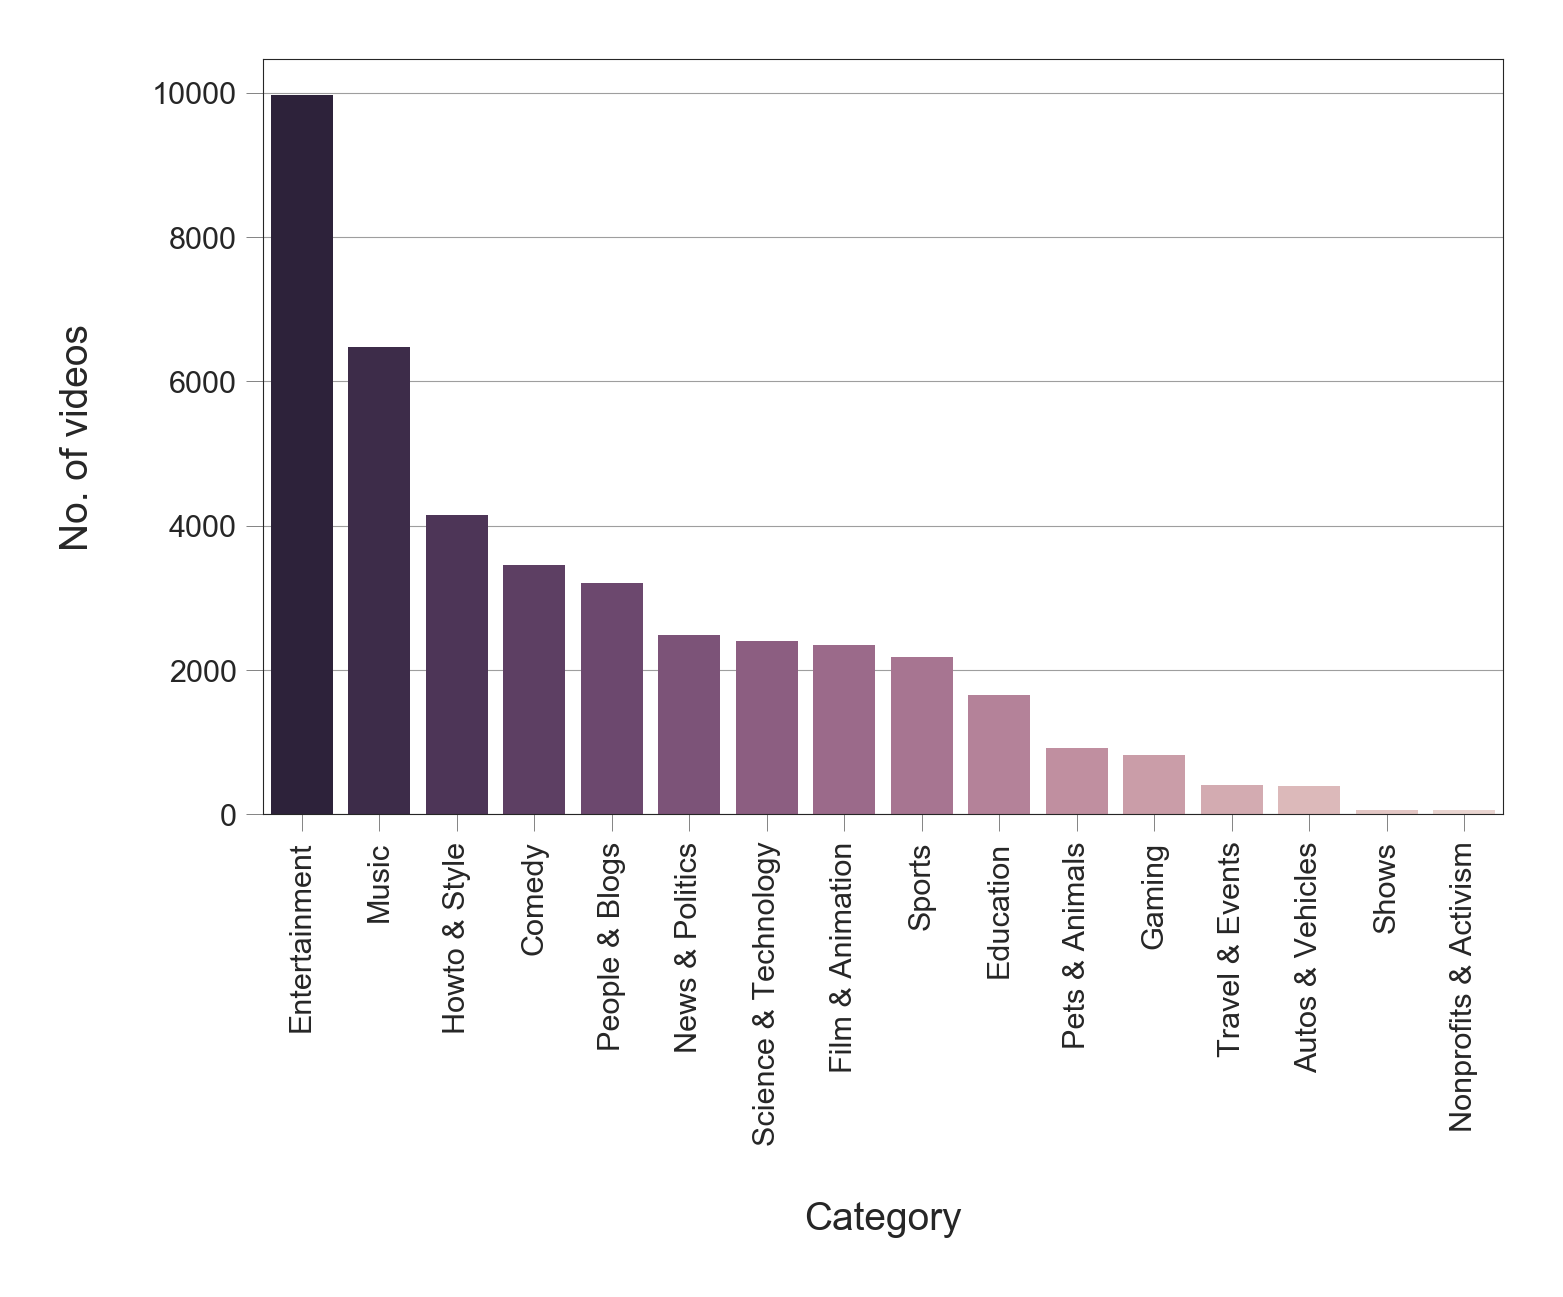

In [37]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

We see that the Entertainment category contains the largest number of trending videos among other categories: around `10,000` videos, followed by Music category with around `6,200` videos, followed by Howto & Style category with around `4,100` videos, and so on.

## <a name="pub"></a>Trending videos and their publishing time
An example value of the `publish_time` column in our dataset is `2017-11-13T17:13:01.000Z`. And according to information on this page: https://www.w3.org/TR/NOTE-datetime, this means that the date of publishing the video is `2017-11-13` and the time is `17:13:01` in Coordinated Universal Time (UTC) time zone.

Let's add two columns to represent the date and hour of publishing each video, then delete the original `publish_time` column because we will not need it anymore

In [38]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

Now we can see which days of the week had the largest numbers of trending videos

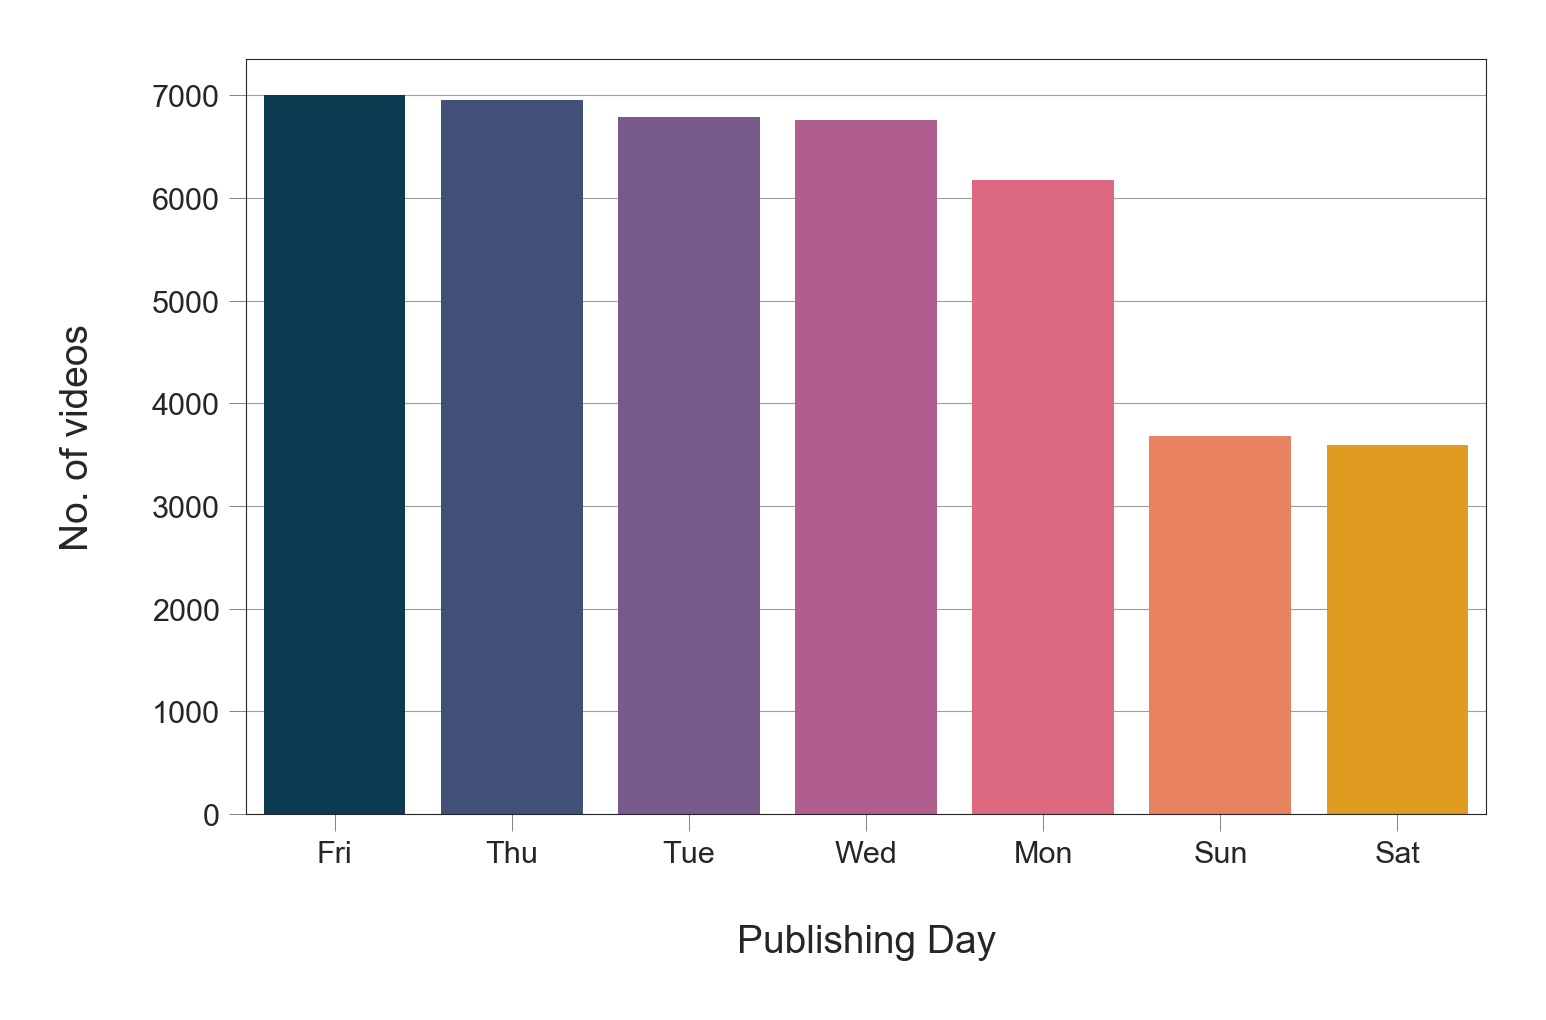

In [39]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

We can see that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.

Now let's use `publishing_hour` column to see which publishing hours had the largest number of trending videos

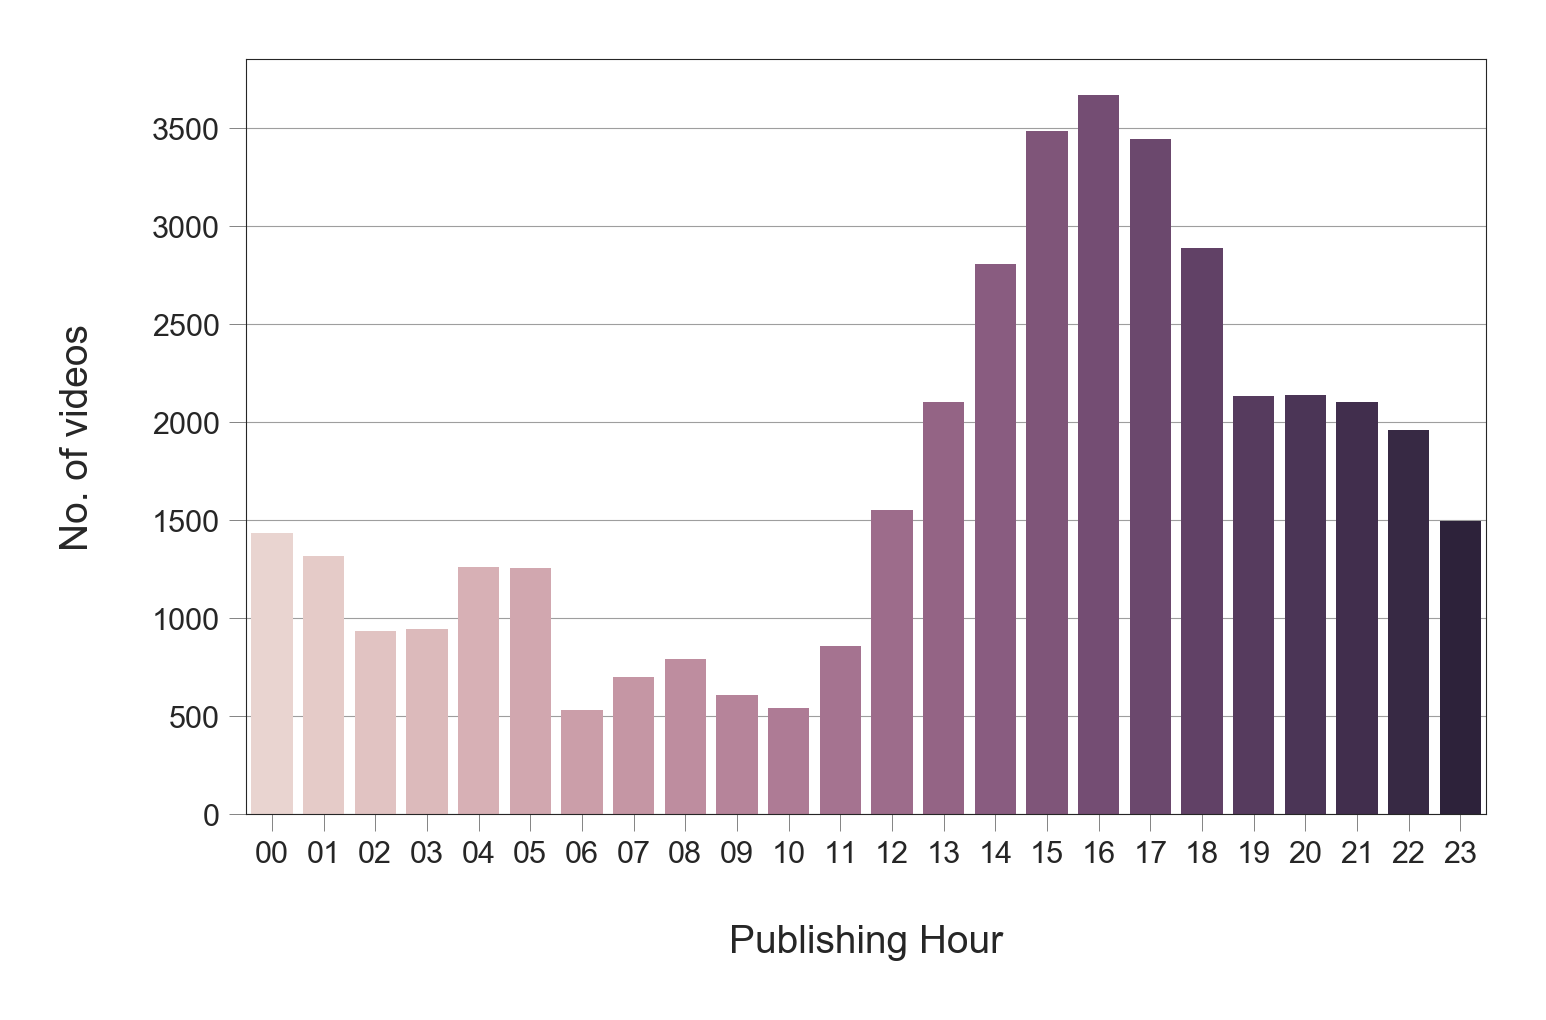

In [40]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

We can see that the period between 2PM and 7PM, peaking between 4PM and 5PM, had the largest number of trending videos. We notice also that the period between 12AM and 1PM has the smallest number of trending videos. But why is that? Is it because people publish a lot more videos between 2PM and 7PM? Is it because how YouTube algorithm chooses trending videos?

In [ ]:
df["video_error_or_removed"].value_counts()

We can see that out of videos that appeared on trending list (`40949` videos), there is a tiny portion (`23` videos) with errors.

## <a name="conc"></a>Conclusions
Here are the some of the results we extracted from the analysis:
* We analyzed a dataset that contains information about YouTube trending videos for 205 days. The dataset was collected in   2018. It contains **`40949`** video entry.
* `71%` of trending videos have less than `1.5` million views, and **`91%`** have less than **`5`** million views.
* `68%` of trending videos have less than `40,000` likes, and **`84%`** have less than **`100,000`** likes.
* `67%` of trending videos have less than `4,000` comments, and **`93%`** have less than **`25,000`** comments.




